# Nicla characterisation analysis
This Jupyter notebook is just providing a dump of the data and should not be used for production data analysis.

<>:26: SyntaxWarning: invalid escape sequence '\O'
<>:26: SyntaxWarning: invalid escape sequence '\O'
C:\Users\irock\AppData\Local\Temp\ipykernel_14148\1481223741.py:26: SyntaxWarning: invalid escape sequence '\O'
  ax1.set_ylabel('Resistance [k$\Omega$]')


,datetime,humidity,temperature,pressure,iaq,iaq_s,co2_eq,b_voc_eq,comp_t,comp_h,comp_g,gas,accuracy
0,2023-12-15 11:09:59.904780,25.37,29.0,1002.15,25,25,500,0.49,25.31,29.58,4,10926.0,0
1,2023-12-15 11:10:04.681260,25.26,29.0,1002.15,25,25,500,0.49,25.31,29.58,4,10926.0,0
2,2023-12-15 11:10:09.945039,25.19,29.0,1002.15,25,25,500,0.49,25.14,29.53,4,11123.0,0
3,2023-12-15 11:10:14.823297,25.12,29.0,1002.13,25,25,500,0.49,25.07,29.45,4,11135.0,0
4,2023-12-15 11:10:19.892573,25.06,28.0,1002.13,25,25,500,0.49,25.04,29.42,4,11219.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76867,2023-12-20 09:58:21.784559,27.49,35.0,988.47,54,37,551,0.60,27.41,35.13,5,30485.0,1
76868,2023-12-20 09:58:27.584438,27.48,35.0,988.45,54,37,551,0.60,27.41,35.13,5,30507.0,1
76869,2023-12-20 09:58:33.577105,27.50,35.0,988.47,55,38,552,0.61,27.42,35.12,5,30396.0,1
76870,2023-12-20 09:58:39.618411,27.50,35.0,988.47,53,37,550,0.60,27.42,35.12,5,30330.0,1


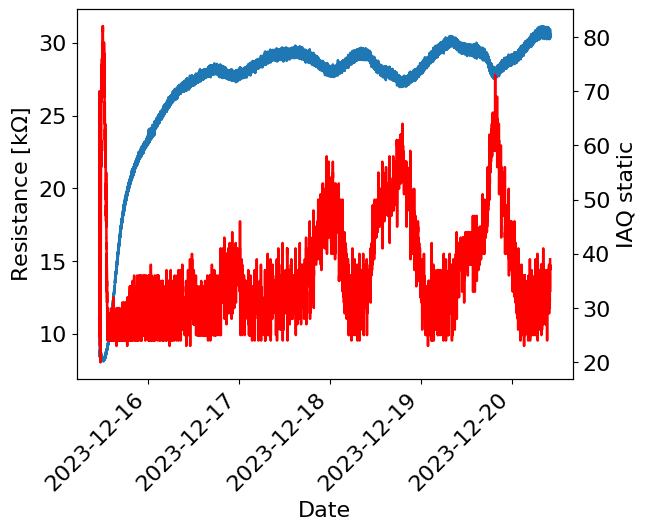

In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# setting up matplotlib
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

# load (partial, until 20/12) data
df = pd.read_csv('../data/nicla_2023_12_15_11_09_51.dat', sep='\t')
# fix datetime field
datetime = pd.to_datetime(df['datetime'])
timedelta = datetime - datetime.iloc[0]
hours_elapsed = timedelta.dt.total_seconds()//3600

# show gas resistance data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(datetime, df['gas']/1000)
ax1.set_xlabel('Date')
ax1.set_ylabel('Resistance [k$\Omega$]')

ax2.plot(datetime, df['iaq_s'],color='r')
ax2.set_ylabel('IAQ static')

for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

df